# House Price Prediction on Kaggle Dataset

<img src="House Price Prediction Using Stacking.png" width=900 alt="a pytorch workflow flowchat"/>

<img src="House Price Prediction 2 layer  Using Stacking.png" width=900 alt="a pytorch workflow flowchat"/>


In [1]:
import os 
os.chdir('./Data')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from scipy.stats import probplot

In [3]:
df = pd.read_csv('train.csv')
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


# Data Modification

In [4]:
# shape
print('Shape of the Data is:: ',df.shape)

Shape of the Data is::  (1460, 81)


In [5]:
df.drop('Id',inplace=True,axis=1)
df.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


## Data Preprocessing

- Outliers

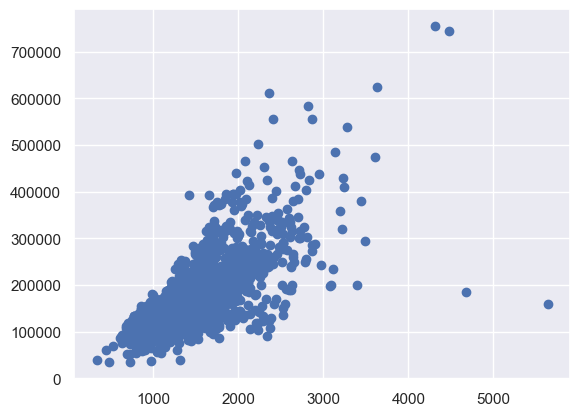

In [6]:
sns.set_theme(context='notebook',style='darkgrid')
plt.scatter(x=df['GrLivArea'],y=df['SalePrice'])

In [7]:
df = df[(df['GrLivArea']<4000) & (df['SalePrice']<600000)]

- Outliers in PoolArea

<Axes: xlabel='PoolArea', ylabel='Density'>

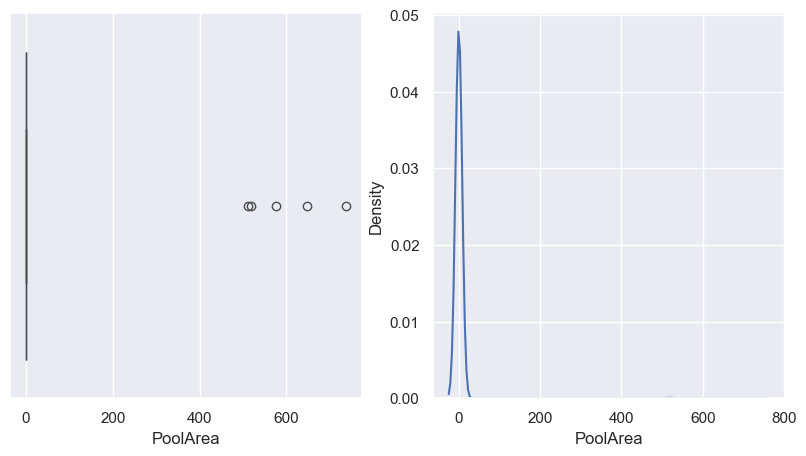

In [8]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x = df['PoolArea'])

plt.subplot(1,2,2)
sns.kdeplot(df['PoolArea'])

- Normal Distr but some outliers present

-  but we must ot remove it as some houses have swimming pool

### Target Variable
- Data Analysis on Target Variable

<Axes: title={'center': 'After'}, xlabel='SalePrice', ylabel='Count'>

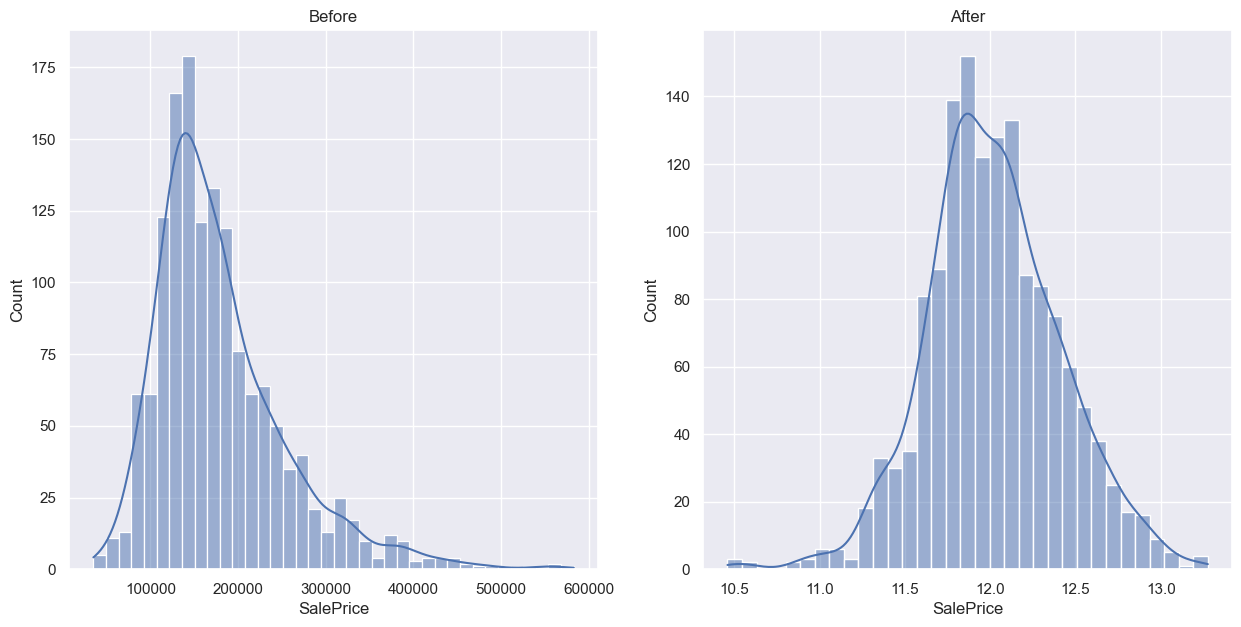

In [9]:
plt.figure(figsize=(15,7))
# Before
plt.subplot(1,2,1)
plt.title('Before')
sns.histplot(df['SalePrice'],kde=True)

# After
plt.subplot(1,2,2)
plt.title('After')
df['SalePrice'] = df['SalePrice'].transform(np.log)
sns.histplot(df['SalePrice'],kde=True)

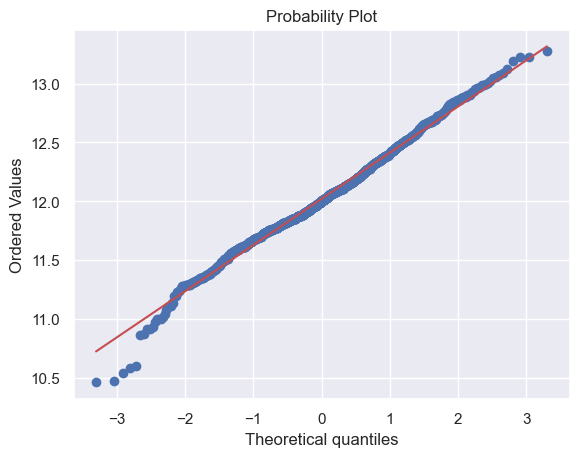

In [10]:
probplot(df['SalePrice'],plot=plt)
plt.show()

In [11]:
print('Sale Price mean:: ',df['SalePrice'].mean())
print('Sale Price Std Dev:: ',df['SalePrice'].std())
print('Sale Price skew:: ',df['SalePrice'].skew())

Sale Price mean::  12.020137263607634
Sale Price Std Dev::  0.39334412148166137
Sale Price skew::  0.029456375474650145


# Feature Engeenering
- Missing Data

In [12]:
pd.DataFrame(df.isna().sum().sort_values(ascending=False).head(20))

,0
PoolQC,1449
MiscFeature,1400
Alley,1363
Fence,1174
MasVnrType,871
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81


C:\Users\Krishan Kumar\AppData\Local\Temp\ipykernel_16964\740764168.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df.isna().sum().sort_values(ascending=False).head(20).index


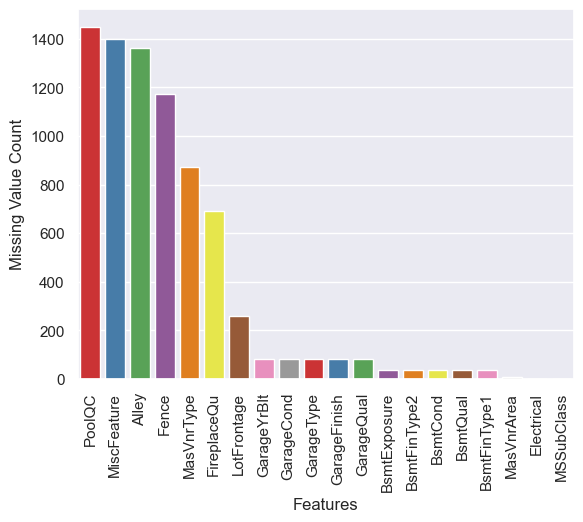

In [13]:
sns.barplot(x = df.isna().sum().sort_values(ascending=False).head(20).index
            ,y =df.isna().sum().sort_values(ascending=False).head(20),palette='Set1')
plt.xlabel('Features')
plt.ylabel('Missing Value Count')
plt.xticks(rotation ='vertical')
print('')

<Axes: >

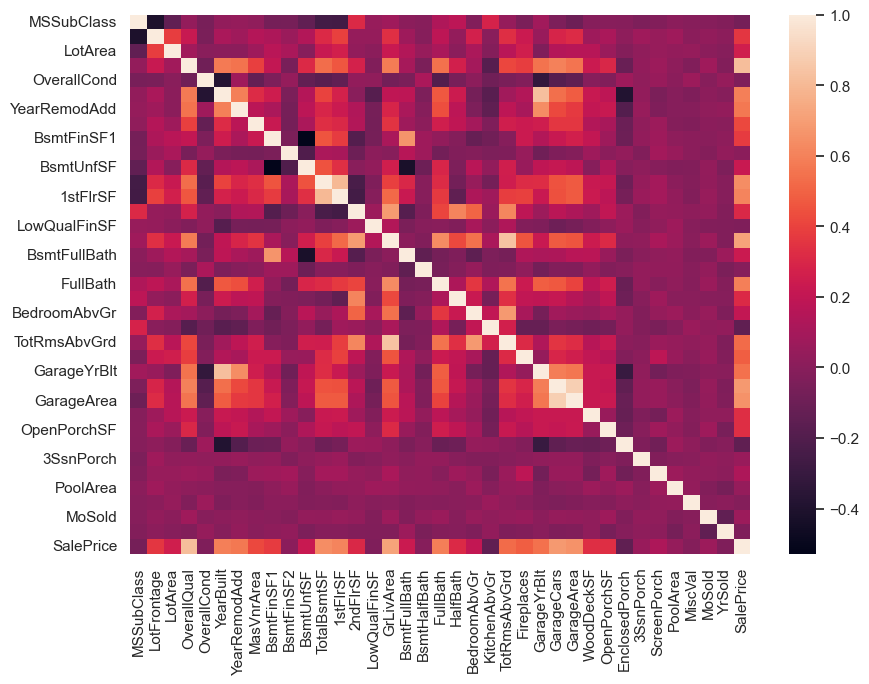

In [14]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(numeric_only=True))

In [15]:
# columns having max corr with sales price
pd.DataFrame(df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)).head(20)

,SalePrice
SalePrice,1.000000
OverallQual,0.817615
GrLivArea,0.715755
GarageCars,0.679282
GarageArea,0.653981
TotalBsmtSF,0.637559
1stFlrSF,0.609703
YearBuilt,0.589244
FullBath,0.589058
YearRemodAdd,0.569653


#### Imputing Missing Values
- PoolQC : data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general. 

In [16]:
df['PoolQC'] = df['PoolQC'].fillna('None')

- MiscFeature : data description says NA means "no misc feature"

In [17]:
df['MiscFeature'] = df['MiscFeature'].fillna('None')

- Alley 

In [18]:
df['Alley'] = df['Alley'].fillna('None')

- Fence

In [19]:
df['Fence'] = df['Fence'].fillna('None')

- FirePlaceQual

In [20]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

- LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the mean LotFrontage of the neighborhood.

In [21]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

- GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None

In [22]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('None')

- GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)

In [23]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)

- BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement

In [24]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)

In [25]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')

- MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type. 

In [26]:
df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

- MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'

In [27]:
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

 - Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.

In [28]:
df.drop('Utilities',axis=1,inplace=True)

- Functional : data description says NA means typical

In [29]:
df['Functional'] = df['Functional'].fillna('Typ')

- Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.

In [30]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [31]:
# check missing values present any
pd.DataFrame(df.isna().sum()[(df.isna().sum()>0)],columns=['Missing_Count'])

,Missing_Count


In [32]:
# Hence No missing Value Present

### Transform Numerical vars Which Are Categorical

In [33]:
df['MSSubClass'] = df['MSSubClass'].astype('O')

#Changing OverallCond into a categorical variable
df['OverallCond'] = df['OverallCond'].astype(str)

# Changing year sold and month sold into categorical variable
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

- Ordinal Encode Categorical Variables

In [34]:
df = df.reset_index(drop=True)
df.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,None,None,None,0,2,2008,WD,Normal,12.247694


In [35]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder

In [36]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

In [37]:
for i in cols:
    oe = OrdinalEncoder()
    p = oe.fit_transform(df[i].values.reshape(-1,1))

    df[i] = pd.Series(p.reshape(-1))

In [38]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5.0,RL,65.0,8450,1.0,1.0,3.0,Lvl,Inside,0.0,...,0,3.0,4.0,None,0,4.0,2.0,WD,Normal,12.247694
1,0.0,RL,80.0,9600,1.0,1.0,3.0,Lvl,FR2,0.0,...,0,3.0,4.0,None,0,7.0,1.0,WD,Normal,12.109011
2,5.0,RL,68.0,11250,1.0,1.0,0.0,Lvl,Inside,0.0,...,0,3.0,4.0,None,0,11.0,2.0,WD,Normal,12.317167
3,6.0,RL,60.0,9550,1.0,1.0,0.0,Lvl,Corner,0.0,...,0,3.0,4.0,None,0,4.0,0.0,WD,Abnorml,11.849398
4,5.0,RL,84.0,14260,1.0,1.0,0.0,Lvl,FR2,0.0,...,0,3.0,4.0,None,0,3.0,2.0,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,5.0,RL,62.0,7917,1.0,1.0,3.0,Lvl,Inside,0.0,...,0,3.0,4.0,None,0,10.0,1.0,WD,Normal,12.072541
1450,0.0,RL,85.0,13175,1.0,1.0,3.0,Lvl,Inside,0.0,...,0,3.0,2.0,None,0,4.0,4.0,WD,Normal,12.254863
1451,6.0,RL,66.0,9042,1.0,1.0,3.0,Lvl,Inside,0.0,...,0,3.0,0.0,Shed,2500,7.0,4.0,WD,Normal,12.493130
1452,0.0,RL,68.0,9717,1.0,1.0,3.0,Lvl,Inside,0.0,...,0,3.0,4.0,None,0,6.0,4.0,WD,Normal,11.864462


- Adding one more important feature

Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each house

In [39]:
# Adding total sqfootage feature 
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

In [40]:
pd.DataFrame(df.skew(numeric_only=True).sort_values(ascending=False)).head(20)

,0
MiscVal,24.426632
PoolArea,17.510482
LotArea,12.659863
3SsnPorch,10.282620
LowQualFinSF,8.992169
LandSlope,4.802572
KitchenAbvGr,4.477847
BsmtFinSF2,4.245246
BsmtHalfBath,4.125654
ScreenPorch,4.112351


- yeo Johnson Transformation of (highly) skewed features

We use the scipy function yeojohnson which computes the Box-Cox transformation of x
.
Note that setting λ=0
is equivalent to log1p used above for the target variable.

In [41]:
from scipy.stats import boxcox,yeojohnson

lamda = 0.19
skw_features = pd.DataFrame(df.skew(numeric_only=True).sort_values(ascending=False)).head(20).index
for i in skw_features:
    p = yeojohnson(df[i],lmbda=lamda)
    df[i] = pd.Series(p)

In [42]:
pd.DataFrame(df.skew(numeric_only=True).sort_values(ascending=False),columns=['Skewness']).head(20)

,Skewness
PoolArea,17.018964
3SsnPorch,7.855666
LowQualFinSF,7.632350
MiscVal,5.670642
LandSlope,4.355411
KitchenAbvGr,4.021514
BsmtHalfBath,3.972297
ScreenPorch,3.193220
BsmtFinSF2,2.650184
EnclosedPorch,2.173909


In [43]:
df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
0,5.0,RL,6.403857,24.070008,1.0,1.0,3.0,Lvl,Inside,0.0,...,3.0,4.0,None,0.0,4.0,2.0,WD,Normal,12.247694,2566
1,0.0,RL,6.866779,24.789752,1.0,1.0,3.0,Lvl,FR2,0.0,...,3.0,4.0,None,0.0,7.0,1.0,WD,Normal,12.109011,2524


- Getting dummy categorical features

In [44]:
df = pd.get_dummies(df)
print(df.shape)

(1454, 221)


- train test spit

In [45]:
train = df.drop('SalePrice',axis=1)
test = df['SalePrice']

In [46]:
# train.values.reshape(-1,220)

# Modelling

In [47]:
from sklearn.ensemble import StackingRegressor,VotingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler,PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split,KFold
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor  
from sklearn.svm import SVR
# xgboost
# lightgbm

In [48]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('SalePrice',axis=1),
                                                 df['SalePrice'])

# Base Models
- Lasso Regression

In [49]:
params = {
    'Lasso__alpha':np.arange(0,1,step=0.1),
    'Lasso__fit_intercept' : [True,False],
    'Lasso__max_iter':[1000,200],
    'Lasso__selection':['cyclic', 'random'],
    'ply__degree':[0,1]
}

In [50]:
lasso = Pipeline([
   ('r_scaler',RobustScaler()),
   ('ply',PolynomialFeatures()),
   ('Lasso',Lasso())
])
grid_lasso = GridSearchCV(estimator=lasso,param_grid=params,n_jobs=-1)

In [51]:
grid_lasso.fit(X_test,y_test)

c:\Users\Krishan Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\Krishan Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Krishan Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.254e+00, tolerance: 6.346e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted us

GridSearchCV(estimator=Pipeline(steps=[('r_scaler', RobustScaler()),
                                       ('ply', PolynomialFeatures()),
                                       ('Lasso', Lasso())]),
             n_jobs=-1,
             param_grid={'Lasso__alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'Lasso__fit_intercept': [True, False],
                         'Lasso__max_iter': [1000, 200],
                         'Lasso__selection': ['cyclic', 'random'],
                         'ply__degree': [0, 1]})

In [52]:
grid_lasso.best_score_,grid_lasso.best_params_

(0.7684987504559933,
 {'Lasso__alpha': 0.0,
  'Lasso__fit_intercept': True,
  'Lasso__max_iter': 200,
  'Lasso__selection': 'random',
  'ply__degree': 1})

- ElasticNet

In [53]:
params = {
    'el__alpha':np.arange(0,1,step=0.1),
    'el__l1_ratio' : np.arange(0,1,step=0.2),
    'el__fit_intercept':[True,False],
    'el__max_iter':[1000,200],
    'el__selection':['cyclic', 'random'],
    'ply__degree':[0,1]
}

In [54]:
elastic = Pipeline([
   ('r_scaler',RobustScaler()),
   ('ply',PolynomialFeatures()),
   ('el',ElasticNet())
])
elastic_grid = GridSearchCV(estimator=elastic,param_grid=params,n_jobs=-1)

In [55]:
elastic_grid.fit(X_test,y_test)

c:\Users\Krishan Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.869e+00, tolerance: 6.346e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(estimator=Pipeline(steps=[('r_scaler', RobustScaler()),
                                       ('ply', PolynomialFeatures()),
                                       ('el', ElasticNet())]),
             n_jobs=-1,
             param_grid={'el__alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'el__fit_intercept': [True, False],
                         'el__l1_ratio': array([0. , 0.2, 0.4, 0.6, 0.8]),
                         'el__max_iter': [1000, 200],
                         'el__selection': ['cyclic', 'random'],
                         'ply__degree': [0, 1]})

In [56]:
elastic_grid.best_score_,elastic_grid.best_params_

(0.8813199631792094,
 {'el__alpha': 0.2,
  'el__fit_intercept': True,
  'el__l1_ratio': 0.0,
  'el__max_iter': 1000,
  'el__selection': 'cyclic',
  'ply__degree': 1})

- Gradient Boosting Regression

In [57]:
params ={
   'gd__learning_rate':[0.1],
    'gd__n_estimators' : [200],
    'gd__min_samples_split':[10],
    'gd__min_samples_leaf':[10],
    'gd__max_depth':[4],
    'gd__ccp_alpha':[0,0.1]
}

In [58]:
gd = Pipeline([
   ('r_scaler',RobustScaler()),
   ('ply',PolynomialFeatures()),
   ('gd',GradientBoostingRegressor())
])
gd_grid = GridSearchCV(estimator=gd,param_grid=params,n_jobs=-1)

In [59]:
gd_grid.fit(X_test,y_test)

GridSearchCV(estimator=Pipeline(steps=[('r_scaler', RobustScaler()),
                                       ('ply', PolynomialFeatures()),
                                       ('gd', GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'gd__ccp_alpha': [0, 0.1], 'gd__learning_rate': [0.1],
                         'gd__max_depth': [4], 'gd__min_samples_leaf': [10],
                         'gd__min_samples_split': [10],
                         'gd__n_estimators': [200]})

In [60]:
gd_grid.best_score_,gd_grid.best_params_

(0.8215061619568651,
 {'gd__ccp_alpha': 0,
  'gd__learning_rate': 0.1,
  'gd__max_depth': 4,
  'gd__min_samples_leaf': 10,
  'gd__min_samples_split': 10,
  'gd__n_estimators': 200})

- Kernel Ridge Regression

In [61]:
params ={
    'kr__alpha':np.arange(0,1,step=0.2),
    'kr__kernel' : ['linear','polynomial','rbf','sigmoid'],
    'kr__degree':[1,2],
    'kr__gamma':[0.1,0.3],
}

In [62]:
kr = Pipeline([
   ('r_scaler',RobustScaler()),
   ('kr',KernelRidge())
])
kr_grid = GridSearchCV(estimator=kr,param_grid=params,n_jobs=-1)

In [63]:
kr_grid.fit(X_test,y_test)

GridSearchCV(estimator=Pipeline(steps=[('r_scaler', RobustScaler()),
                                       ('kr', KernelRidge())]),
             n_jobs=-1,
             param_grid={'kr__alpha': array([0. , 0.2, 0.4, 0.6, 0.8]),
                         'kr__degree': [1, 2], 'kr__gamma': [0.1, 0.3],
                         'kr__kernel': ['linear', 'polynomial', 'rbf',
                                        'sigmoid']})

In [64]:
kr_grid.best_score_,kr_grid.best_params_

(0.815671670963132,
 {'kr__alpha': 0.2,
  'kr__degree': 1,
  'kr__gamma': 0.1,
  'kr__kernel': 'polynomial'})

- SVM Regressor

In [65]:
params ={
    'svm__gamma':['scale','auto'],
    'svm__kernel' : ['linear','polynomial','rbf','sigmoid'],
    'svm__degree':[1,2],
    'svm__C': np.arange(0,1,step=0.3),
}

In [66]:
svr = Pipeline([
   ('r_scaler',RobustScaler()),
   ('svm',SVR())
])
svr_grid = GridSearchCV(estimator=svr,param_grid=params,n_jobs=-1)

In [67]:
svr_grid.fit(X_test,y_test)

c:\Users\Krishan Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
140 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Krishan Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Krishan Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  F

GridSearchCV(estimator=Pipeline(steps=[('r_scaler', RobustScaler()),
                                       ('svm', SVR())]),
             n_jobs=-1,
             param_grid={'svm__C': array([0. , 0.3, 0.6, 0.9]),
                         'svm__degree': [1, 2], 'svm__gamma': ['scale', 'auto'],
                         'svm__kernel': ['linear', 'polynomial', 'rbf',
                                         'sigmoid']})

In [68]:
svr_grid.best_score_,svr_grid.best_params_

(0.8499173263629457,
 {'svm__C': 0.3,
  'svm__degree': 1,
  'svm__gamma': 'scale',
  'svm__kernel': 'linear'})

- Random Forest

In [69]:
dt = RandomForestRegressor(max_depth=20,min_samples_split=10,min_samples_leaf=5)
dt.fit(X_train,y_train)
r2_score(y_test,dt.predict(X_test))

0.8529062377028773

- XGBOost

In [70]:
#soon

- Light GBM

In [71]:
# soon

# Stacking ALL the Base Models

In [72]:
class HousePricePRedictor_OneLayerStack:
    def __init__(self):
        self.scaler = RobustScaler()
        estimators =[
            ('1',Lasso(alpha= 0.0,fit_intercept= True,max_iter= 200,selection= 'random')),
            ('2',ElasticNet(alpha= 0.1,fit_intercept= True,l1_ratio= 0.0,max_iter= 1000,selection= 'cyclic')),
            ('3',KernelRidge(alpha= 0.2,degree= 1,gamma= 0.1,kernel= 'polynomial')),
            ('4',GradientBoostingRegressor(ccp_alpha= 0,learning_rate= 0.1,max_depth= 4,min_samples_leaf= 10,min_samples_split= 10,n_estimators=200)),
            ('5',SVR(C= 0.3,degree= 1,gamma= 'scale',kernel= 'linear')),
            ('6',RandomForestRegressor(max_depth=20,min_samples_split=10,min_samples_leaf=5))
        ]
        self.stack = StackingRegressor(estimators=estimators,cv=2,
                                       final_estimator=LinearRegression(),n_jobs=-1)

    def fit(self,X,y):
        self.stack.fit(X,y)

    def pd(self,X):
        return self.stack.predict(X)

In [73]:
model = HousePricePRedictor_OneLayerStack()
model.fit(X_train,y_train)
# model.predict(X_test,y_test)

In [74]:
r2_score(y_test,model.pd(X_test))

0.9011527943662541

In [75]:
model.stack

StackingRegressor(cv=2,
                  estimators=[('1',
                               Lasso(alpha=0.0, max_iter=200,
                                     selection='random')),
                              ('2', ElasticNet(alpha=0.1, l1_ratio=0.0)),
                              ('3',
                               KernelRidge(alpha=0.2, degree=1, gamma=0.1,
                                           kernel='polynomial')),
                              ('4',
                               GradientBoostingRegressor(ccp_alpha=0,
                                                         max_depth=4,
                                                         min_samples_leaf=10,
                                                         min_samples_split=10,
                                                         n_estimators=200)),
                              ('5', SVR(C=0.3, degree=1, kernel='linear')),
                              ('6',
                               RandomForestRegressor(max_depth=20,
                                                     min_samples_leaf=5,
                                                     min_samples_split=10))],
                  final_estimator=LinearRegression(), n_jobs=-1)

## Multi Layered Model

In [76]:
class HousePricePRedictor_TwoLayerStack:
    def __init__(self):
        self.scaler = RobustScaler()
        estimators =[
            Lasso(alpha= 0.0,fit_intercept= True,max_iter= 200,selection= 'random'),
            ElasticNet(alpha= 0.1,fit_intercept= True,l1_ratio= 0.0,max_iter= 1000,selection= 'cyclic'),
        ]
        self.__stack1 = estimators
        
        estimators =[
            ('3',KernelRidge(alpha= 0.2,degree= 1,gamma= 0.1,kernel= 'polynomial')),
            ('4',GradientBoostingRegressor(ccp_alpha= 0,learning_rate= 0.1,max_depth= 4,min_samples_leaf= 10,min_samples_split= 10,n_estimators=200)),
            ('5',SVR(C= 0.3,degree= 1,gamma= 'scale',kernel= 'linear')),
            ('6',RandomForestRegressor(max_depth=20,min_samples_split=10,min_samples_leaf=5))

        ]

        self.__stack2 = StackingRegressor(estimators=estimators,cv=2,
                                       final_estimator=LinearRegression(),n_jobs=-1)
        
        self.stack = None
    def fit(self,X,y):
        # Layer 1 Model 1
        self.__stack1[0].fit(X,y)
        m1_pred = self.__stack1[0].predict(X)

        # Layer 2 Model 2
        self.__stack1[1].fit(X,y)
        m2_pred = self.__stack1[1].predict(X)

        # Layer 2 + Meta Model
        self.__stack2.fit(np.hstack([m1_pred.reshape(-1,1),m2_pred.reshape(-1,1)]),y)

    def pd(self,X):
        m1_pred = self.__stack1[0].predict(X)
        m2_pred = self.__stack1[1].predict(X)

        return self.__stack2.predict(np.hstack([m1_pred.reshape(-1,1),m2_pred.reshape(-1,1)]))
        

In [77]:
model2 = HousePricePRedictor_TwoLayerStack()
model2.fit(X_train,y_train)

c:\Users\Krishan Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\Krishan Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Krishan Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.714e+00, tolerance: 1.613e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted us

In [80]:
y_pred = model2.pd(X_test)

In [81]:
r2_score(y_test,y_pred)

0.8834346081013582

In [88]:
model2._HousePricePRedictor_TwoLayerStack__stack2

StackingRegressor(cv=2,
                  estimators=[('3',
                               KernelRidge(alpha=0.2, degree=1, gamma=0.1,
                                           kernel='polynomial')),
                              ('4',
                               GradientBoostingRegressor(ccp_alpha=0,
                                                         max_depth=4,
                                                         min_samples_leaf=10,
                                                         min_samples_split=10,
                                                         n_estimators=200)),
                              ('5', SVR(C=0.3, degree=1, kernel='linear')),
                              ('6',
                               RandomForestRegressor(max_depth=20,
                                                     min_samples_leaf=5,
                                                     min_samples_split=10))],
                  final_estimator=LinearRegression(), n_jobs=-1)

# Exporting The Model

In [82]:
import pickle as pkl
pkl.dump(model,open('SingleLayerModel.pkl','wb'))
pkl.dump(model2,open('DoubleLayerModel.pkl','wb'))

# ---------------------END----------------------------